In [2]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Helpers
import sys
from datetime import datetime
import pickle

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold
from sklearn.decomposition import PCA,KernelPCA
import lightgbm as lgb

import sys
sys.path.insert(0,'../../') 
from helpers import *
from MAP_estimator import MAP_estimator

# Algorithm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/'

In [4]:
v_name = pd.read_pickle(data_path+'vGeneName.pkl')
train_y = pd.read_csv(data_path+'train_y.csv')

In [5]:
v_name = pd.merge(train_y,v_name,on='sample_name')

In [6]:
v_name.head()

,sample_name,phenotype_status,TCRBV01-01,TCRBV02-01,TCRBV03-01,TCRBV03-02,TCRBV04-01,TCRBV04-02,TCRBV04-03,TCRBV05-01,...,TCRBV25-01,TCRBV26-01,TCRBV26-or09_02,TCRBV27-01,TCRBV28-01,TCRBV29-01,TCRBV30-01,TCRBVA-or09_02,null,unresolved
0,RA47,1,18,925,0,0,872,205,0,893,...,117,0,0,1111,722,381,9,0,2896,0
1,HC9,0,7,491,0,0,593,220,326,546,...,121,0,0,839,582,335,251,0,2761,0
2,RA29,1,20,934,1,0,1073,317,2,450,...,195,0,0,1345,903,584,662,1,4164,0
3,RA8,1,1,204,0,0,308,73,0,332,...,47,0,0,378,216,108,102,0,0,1141
4,RA63,1,2,163,0,0,130,72,95,162,...,33,0,0,250,228,135,114,1,964,0


In [8]:
vName = v_name.drop(['sample_name','phenotype_status'],axis=1).columns.values

In [10]:
count_l = dict()
pos_count = []
neg_count = []
for v in vName:
    count_l[v] = v_name[v].sum()
    neg_count.append(v_name[v_name['phenotype_status']==0][v].mean())
    pos_count.append(v_name[v_name['phenotype_status']==1][v].mean())
   

In [11]:
vN = [i.replace('TCRBV','') for i in vName]

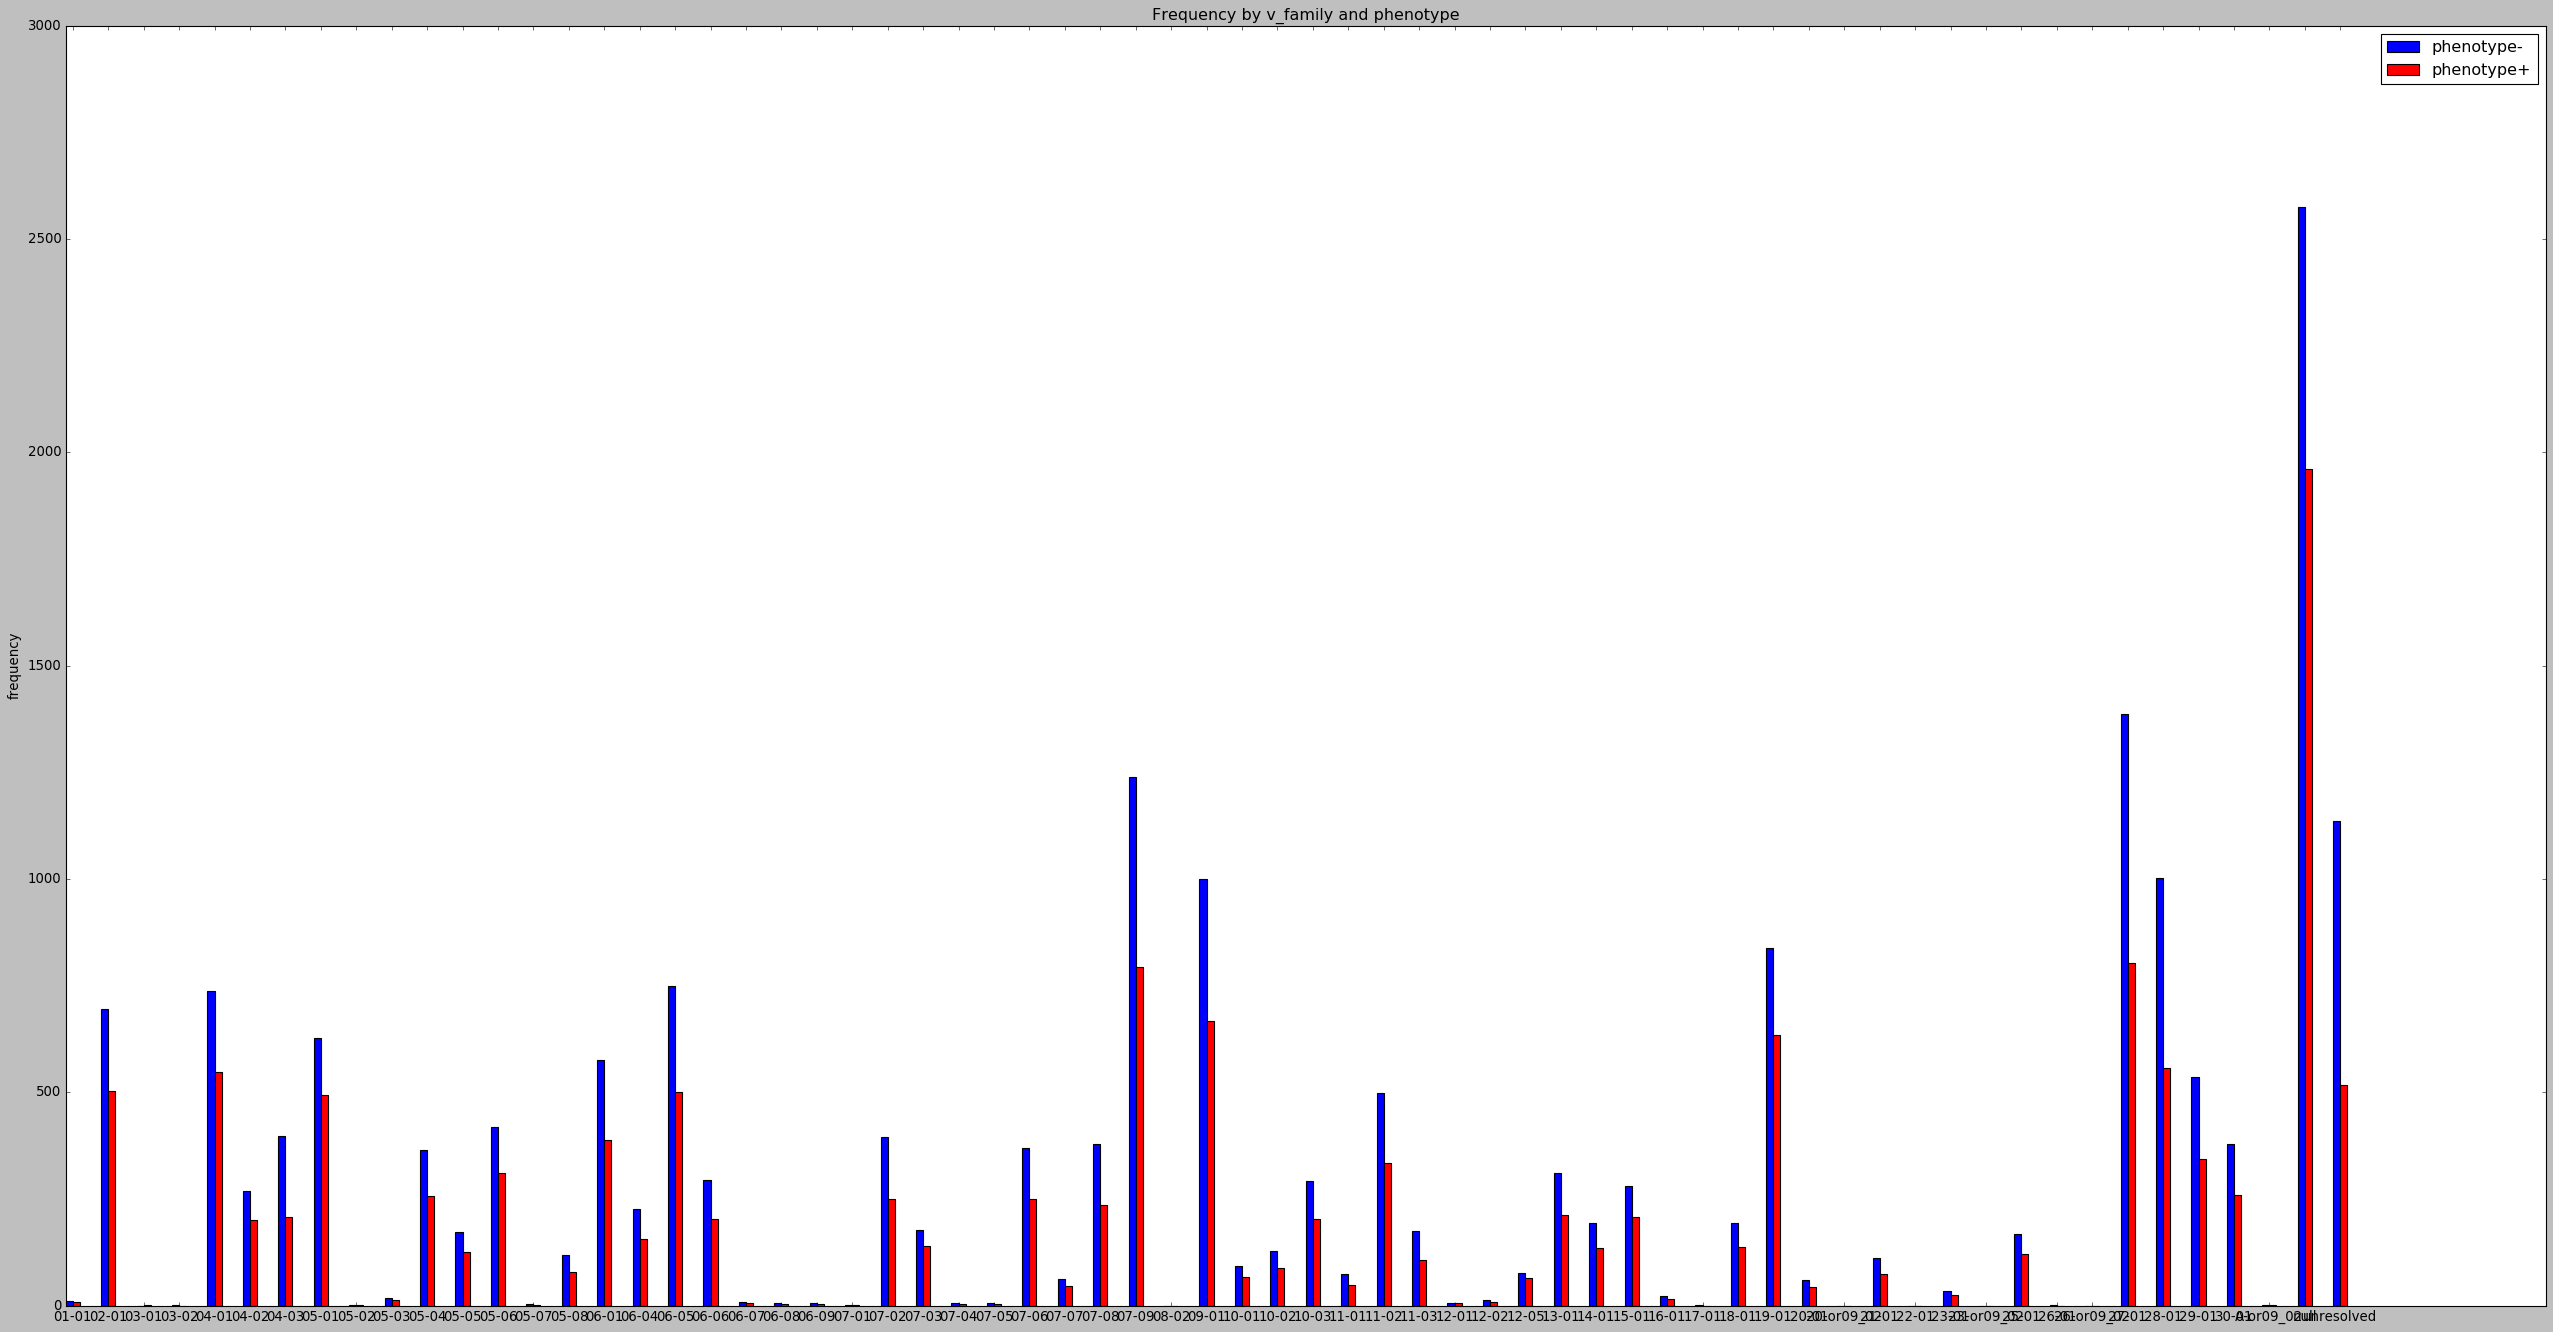

In [18]:
N = len(vName)

ind = np.arange(N)    # the x locations for the groups
width = 0.2    # the width of the bars: can also be len(x) sequence

plt.style.use('classic')
plt.figure(figsize=(40,20))
p1 = plt.bar(ind, neg_count, width,color='b')
p2 = plt.bar(ind+width, pos_count, width,color='r')

plt.ylabel('frequency')
plt.title('Frequency by v_family and phenotype')
plt.xticks(ind+width, vN)
plt.legend((p1[0], p2[0]), ('phenotype-', 'phenotype+'), loc='best')

plt.show()